In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import matplotlib 
from matplotlib.offsetbox import AnchoredText
from matplotlib import rcParams

from utils import parse_filename, natural_sort
from glob import glob
from itertools import groupby

#rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'

rcParams['lines.linewidth'] = 1

rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20


rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

rcParams['legend.fancybox'] = True
rcParams['legend.fontsize'] = 16

markers = ['o', 's', 'D', '*', 'x', '^', '<', 'h']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

In [2]:
#first group files according to the key
def keyfunc(f):
    n, dim, rs, T, d, h1, h2, b = parse_filename(f)
    return n, T, d, h1, h2, b

files = []
for n in [29, 49, 57]:
    files += glob("../data/n_%d_dim_2_rs_*_Theta_0.15_Emax_*_twist_*_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.10_hutchinson_damping_0.00100_maxnorm_0.00100_*/data.txt" % n)

for f in list(files):
    n, dim, rs, T, d, h1, h2, b = parse_filename(f)
files = [natural_sort(list(l)) for k, l in groupby(sorted(files, key=keyfunc), keyfunc)]

print(files)

[['../data/n_29_dim_2_rs_1.0_Theta_0.15_Emax_25_twist_0.250_0.250_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.10_hutchinson_damping_0.00100_maxnorm_0.00100_batch_2048_ndevices_8_accsteps_4/data.txt', '../data/n_29_dim_2_rs_3.0_Theta_0.15_Emax_25_twist_0.250_0.250_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.10_hutchinson_damping_0.00100_maxnorm_0.00100_batch_2048_ndevices_8_accsteps_4/data.txt', '../data/n_29_dim_2_rs_5.0_Theta_0.15_Emax_25_twist_0.250_0.250_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.10_hutchinson_damping_0.00100_maxnorm_0.00100_batch_2048_ndevices_8_accsteps_4/data.txt', '../data/n_29_dim_2_rs_10.0_Theta_0.15_Emax_25_twist_0.250_0.250_nlayers_2_modelsize_16_nheads_4_nhidden_32_depth_2_spsize_16_tpsize_16_Gmax_15_kappa_10_mctherm_10_mcsteps_5

[1.0, 3.0, 5.0, 10.0]
S0: 12.121455 S: [9.788182654491028, 8.029805219024658, 6.509701430784866, 4.624451254812502]
[1.0, 3.0, 5.0, 10.0]
S0: 21.86654 S: [18.89381540535747, 13.73861500635334, 12.02167994545375, 8.849217565734508]
[1.0, 3.0, 5.0, 10.0]
S0: 25.446724 S: [19.03939523297276, 15.016701141990177, 12.391407223210262, 9.867338335086252]


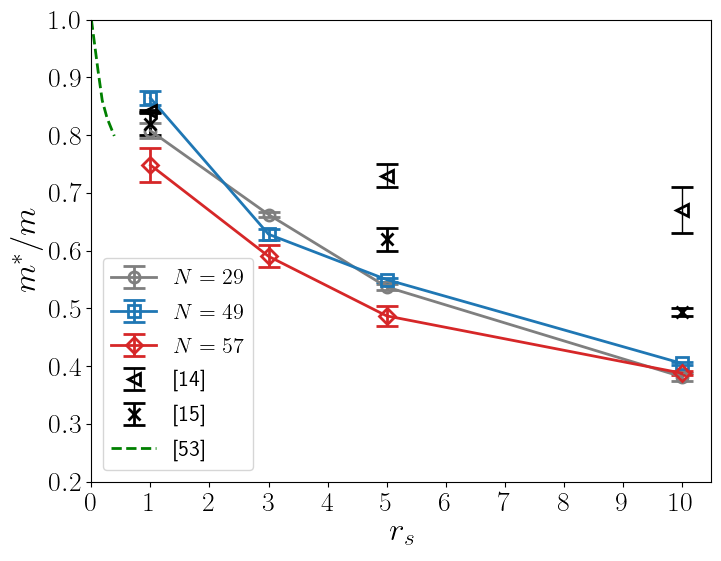

In [3]:
from ewm import running_average
colors = ['C7', 'C0', 'C3', 'C1', 'C2', 'C4', 'C5', 'C6']

f, ax = plt.subplots(1, 1, figsize=(8, 6))
for fg, marker, color in zip(files, markers, colors):
    xlist = []
    ylist = []
    yerrlist = []
    for fi in fg:
        n, dim, rs, T, d, h1, h2, b = parse_filename(fi)
        epoch, f, f_err, e, e_err, ke, ke_err, v, v_err, s, s_err, accratio = np.loadtxt(fi, unpack=True)
        xlist.append(rs)
        s_ewm, s_ewm_var = running_average(s[:3000], 0.01)
        ylist.append(s_ewm[-1]/s_ewm[0])
        yerrlist.append(np.sqrt(s_ewm_var[-1])/s_ewm[0])

    print(xlist)
    print("S0:", s[0], "S:", [y * s[0] for y in ylist])
    label = r"$N = %d$" % n
    plt.errorbar(xlist, ylist, yerr=yerrlist, marker=marker, color=color, 
                 lw=2, markerfacecolor='none', markeredgewidth=2, ms=8, label=label, capsize=8)
plt.xlabel(r'$r_s$')
plt.ylabel(r'$m^\ast/m$')

rs = [1, 5, 10]
#https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.245104
#y = [0.863, 0.71, 0.61]
#yerr = [0.004, 0.01, 0.01]
#plt.errorbar(rs, y, yerr, marker='x', color='k', label='[13]', ls='none',
#              markerfacecolor='none', markeredgewidth=2, ms=8, capsize=8)

#https://journals.aps.org/prb/abstract/10.1103/PhysRevB.87.045131
#y = [0.851, 0.74, 0.70]
#yerr = [0.005, 0.01, 0.03]
#plt.errorbar(rs, y, yerr, marker='>', color='k', label='[14]', ls='none',
#              markerfacecolor='none', markeredgewidth=2, ms=8, capsize=8)

#https://journals.aps.org/prb/abstract/10.1103/PhysRevB.88.035133
y = [0.841, 0.73, 0.67]
yerr = [0.003, 0.02, 0.04]
plt.errorbar(rs, y, yerr, marker='<', color='k', label='[14]', ls='none',
              markerfacecolor='none', markeredgewidth=2, ms=8, capsize=8)

#https://journals.aps.org/prb/abstract/10.1103/PhysRevB.88.035133
y = [0.82, 0.62, 0.493]
yerr = [0.02, 0.02, 0.007]
plt.errorbar(rs, y, yerr, marker='x', color='k', label='[15]', ls='none',
              lw=2, markerfacecolor='none', markeredgewidth=2, ms=8, capsize=8)

x_near0, y_near0 = np.array([
    [0., 1.],
    [0.11224489795918391, 0.9117854622441779],
    [0.18367346938775508, 0.8599153140437545],
    [0.26530612244897966, 0.8295695130557517],
    [0.387755102040817, 0.7985179957657023]]).T
plt.plot(x_near0, y_near0, "--", color="green", label="[53]", lw=2)

plt.xticks(range(0, 11))
plt.xlim([0., 10.5])
plt.ylim([0.2, 1.0])
handles,labels = ax.get_legend_handles_labels()

handles = handles[1:] + handles[:1]
labels = labels[1:] + labels[:1]

plt.legend(handles,labels)
plt.show()